# Descriptive statistics worked example
Using a Kaggle dataset with health and sleep information

https://www.kaggle.com/datasets/hanaksoy/health-and-sleep-statistics

Step 1 : Specify the problem

We are looking to understand the causes of sleep disorders

Step 2 : Explore the data with statistics and visualizations

In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data = pd.read_csv('data\Health_Sleep_Statistics.csv')

Quick look at the data

In [3]:
raw_data.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [4]:
len(raw_data)

100

Multiple side by side plots for key attributes

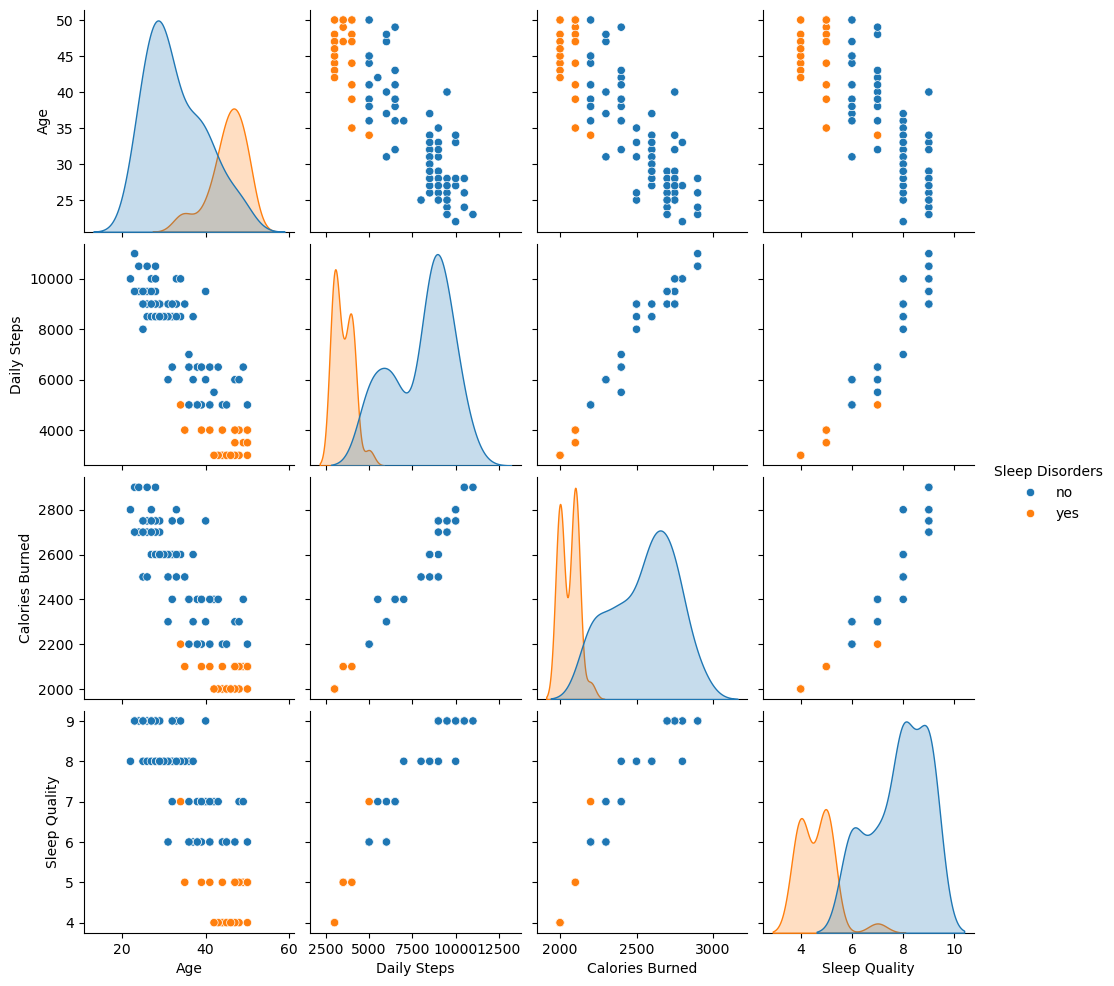

In [18]:
import seaborn as sns
sns.pairplot(raw_data[['Age', 'Daily Steps', 'Calories Burned', 'Sleep Quality', 'Sleep Disorders']], hue='Sleep Disorders')
# Commented out reference for a single plot
# sns.histplot(raw_data['Calories Burned'], kde=True)

Create a new dataset for the two categories amd explore the statistics for each

In [6]:
affected = raw_data.loc[raw_data['Sleep Disorders'] == 'yes']
not_affected = raw_data.loc[raw_data['Sleep Disorders'] == 'no']

In [7]:
len(affected)

26

In [8]:
len(not_affected)

74

In [9]:
affected.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,48.346154,45.269231,4.615385,3500.000000,2057.692308
std,30.062525,4.313307,0.697247,547.722558,57.779421
min,2.000000,34.000000,4.000000,3000.000000,2000.000000
25%,23.000000,44.000000,4.000000,3000.000000,2000.000000
50%,48.000000,46.000000,5.000000,3500.000000,2100.000000
75%,73.000000,48.000000,5.000000,4000.000000,2100.000000
max,98.000000,50.000000,7.000000,5000.000000,2200.000000


In [10]:
not_affected.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,74.000000,74.000000,74.000000,74.00000,74.000000
mean,51.256757,32.756757,7.837838,8000.00000,2548.648649
std,28.804519,7.022100,1.085736,1739.94174,206.067713
min,1.000000,22.000000,6.000000,5000.00000,2200.000000
25%,27.250000,27.250000,7.000000,6500.00000,2400.000000
50%,51.500000,31.000000,8.000000,8500.00000,2600.000000
75%,75.750000,38.000000,9.000000,9375.00000,2700.000000
max,100.000000,50.000000,9.000000,11000.00000,2900.000000


Next, look at the skew of key distributions

In [11]:
from scipy.stats import skew
skew(raw_data['Calories Burned'])

np.float64(-0.08819235056792002)

In [12]:
skew(raw_data['Daily Steps'])

np.float64(-0.21508122714453884)

So I have a hypothesis that there is a relationship between daily steps and sleep quality. Look at the correlation

In [13]:
raw_data[['Daily Steps', 'Sleep Quality']].corr()

,Daily Steps,Sleep Quality
Daily Steps,1.000000,0.976277
Sleep Quality,0.976277,1.000000


In [14]:
raw_data[['Calories Burned', 'Sleep Quality']].corr()

,Calories Burned,Sleep Quality
Calories Burned,1.000000,0.973557
Sleep Quality,0.973557,1.000000


The t-test quantifies the difference between the arithmetic means of the two samples

The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true

A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance

Therefore, we do not reject the null hypothesis of equal population means

If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means

In [15]:
from scipy.stats import ttest_ind
ttest_ind(affected['Daily Steps'], not_affected['Daily Steps'])

TtestResult(statistic=np.float64(-12.926620032725472), pvalue=np.float64(6.700800805823834e-23), df=np.float64(98.0))

Plot out side by side

<Axes: xlabel='Daily Steps', ylabel='Count'>

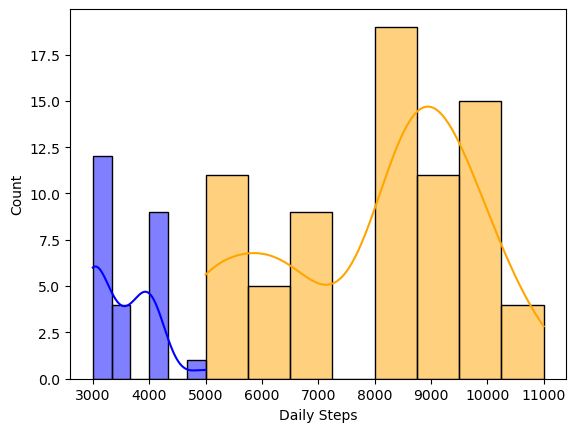

In [16]:
sns.histplot(affected['Daily Steps'], color='blue', kde=True, label='Affected')
sns.histplot(not_affected['Daily Steps'], color='orange', kde=True, label='Not affected')

Look to define a regression line through the data

<Axes: xlabel='Daily Steps', ylabel='Sleep Quality'>

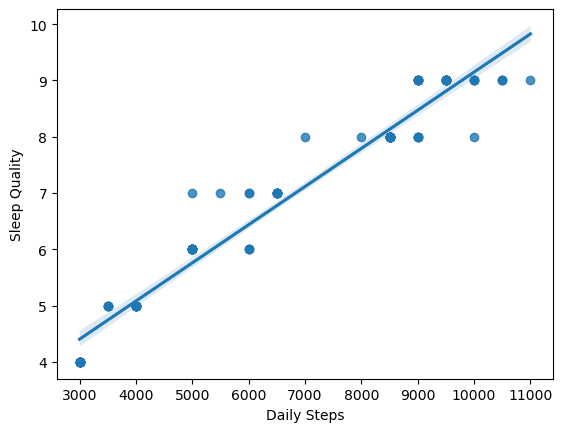

In [17]:
sns.regplot(data=raw_data, x='Daily Steps', y='Sleep Quality')